# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。


不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

## 8 - 金融数据与时间处理



<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>
    
 
有关于 pandas 的常用操作，在前面几个章节已经基本介绍完毕。
    
但是在利用 pandas 进行数据分析时，一个很重要的操作就是与带有时间属性的数据进行交互。
    
并且常常与股票、基金、数字货币等数据相关。
    
因此，本章是一个专题练习，将介绍
- pandas操作时间
- 股票数据分析
- k线图制作



## 初始化

<br>

该 `Notebook` 版本为**纯习题版**

如果需要答案或者提示，可以微信搜索公众号「早起Python」获取！

## 8-1 pandas中的时间操作

### 1 - 时间生成｜当前时间

使用 pandas 获取当前时间


In [2]:
import pandas as pd

pd.Timestamp('now')

Timestamp('2022-01-28 14:13:27.955377')

### 2 - 时间生成｜指定范围




pandas.date_range(
    
    start=None, 
    end=None, 
    periods=None, 
    freq=None, 
    tz=None, 
    normalize=False, 
    name=None, 
    closed=NoDefault.no_default, 
    inclusive=None, 
    **kwargs
    )

Of the four parameters `start, end, periods, and freq`, exactly three must be specified. If freq is omitted, the resulting DatetimeIndex will have periods linearly spaced elements between start and end (closed on both sides).

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部日期

In [6]:
time_range=pd.date_range('1/1/2020','12/31/2020')
len(time_range)

366

### 3 - 时间生成｜指定长度

使用 pandas 从 2021年1月1日开始，按天生成 10 天日期

In [7]:
pd.date_range("2021-01-01", periods=10)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')

### 4 - 时间生成｜指定频率

使用 pandas 从 2021年1月1日开始，按周生成 7 周日期

In [11]:
pd.date_range("2021-01-01", periods=7, freq="W")

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14'],
              dtype='datetime64[ns]', freq='W-SUN')

### 5 - 时间生成｜特殊规律

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部**工作日**日期

In [ ]:
date=pd.bdate_range(start='1/1/2022', end='12/31/2022')
date2=pd.date_range(start='1/1/2022', end='12/31/2022',freq="B")
date==date2

### 6 - 时间计算｜时间差（天）

使用 pandas 计算 2021年2月14日 距离今天相差多少天

In [32]:
(pd.Timestamp('now') - pd.to_datetime('2021-02-14')).days
(pd.Timestamp('now') - pd.to_datetime('2021-02-14')).value
#  Timedelta is the pandas equivalent of python’s datetime.timedelta
pd.Timestamp('now').dayofweek==pd.Timestamp('now').weekday()
# ==pd.Timestamp('now').day_of_week
pd.Timestamp('now').day_of_year==pd.Timestamp('now').dayofyear
pd.Timestamp('now').daysinmonth==pd.Timestamp('now').days_in_month
pd.to_datetime('2021-02-14').weekofyear

348

30120154593959000

True

True

True

6

### 7 - 时间计算｜时间差（小时）

使用 pandas 计算 2021年9月1日13点14分 距离今天相差多少小时

In [37]:
import numpy as np
(pd.Timestamp('now') - pd.to_datetime('2021-09-01 13:14:00'))/np.timedelta64(1, 'D')

149.06340818490742

### 8 - 时间运算

将第一题得到的时间减去一天

to_timedelta(arg, unit=None, errors='raise') 

可以不用','直接上('1 days')

unitstr, optional
Denotes the unit of the arg for numeric arg. Defaults to "ns".

Possible values:

‘W’

‘D’ / ‘days’ / ‘day’

‘hours’ / ‘hour’ / ‘hr’ / ‘h’

‘m’ / ‘minute’ / ‘min’ / ‘minutes’ / ‘T’

‘S’ / ‘seconds’ / ‘sec’ / ‘second’

‘ms’ / ‘milliseconds’ / ‘millisecond’ / ‘milli’ / ‘millis’ / ‘L’

‘us’ / ‘microseconds’ / ‘microsecond’ / ‘micro’ / ‘micros’ / ‘U’

‘ns’ / ‘nanoseconds’ / ‘nano’ / ‘nanos’ / ‘nanosecond’ / ‘N’

In [46]:
(pd.Timestamp('now') - pd.to_timedelta('1, days'))
(pd.Timestamp('now') - pd.to_timedelta(1, 'days'))
(pd.Timestamp('now') - pd.to_timedelta('1D'))
(pd.Timestamp('now') - pd.to_timedelta('1D'))
# 以上都可以

Timestamp('2022-01-27 14:50:00.497158')

Timestamp('2022-01-27 14:50:00.499154')

Timestamp('2022-01-27 14:50:00.502146')

### 9 - 时间格式化

将上一题的结果式化为 xx年xx月xx日-xx时xx分xx秒

In [ ]:
(pd.Timestamp('now') - pd.to_timedelta('1 day')).strftime("%Y年%m月%d日-%H时%M分%S秒")

## 8-2 股票数据分析

### 10 - 加载数据

本小节的数据将通过 [akshare](https://www.akshare.xyz/data/stock/stock.html#id8) 获取

如果你的电脑上未安装 akshare，可以执行下方代码进行安装

In [1]:
#  已安装 
# pip install akshare -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host=mirrors.aliyun.com  --upgrade


In [7]:
import pandas as pd
import akshare as ak
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['font.sans-serif'] = ['SimHei']   # 设置简黑字体
plt.rcParams['axes.unicode_minus'] = False  # 解决'-'' bug

如果任何原因安装、导入失败，可以取消下方代码的注释，从本地读取数据

In [58]:
# 日线
# df1 = ak.stock_zh_a_hist(symbol="600519", period="daily", start_date="20220101", end_date='20220128', adjust="qfq")
df1 = pd.read_csv("000001_daily.csv")
df1
# 5min
# df2 = ak.stock_zh_a_hist_min_em(symbol="000001", period='5', adjust='qfq', start_date="2021-08-01 09:32:00", end_date="2021-09-14 09:32:00")
df2 = pd.read_csv("000001_5min.csv")
df2.columns

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2017/1/3,8.27,8.32,8.34,8.25,459840,420595184,1.09,0.73,0.06,0.31
1,2017/1/4,8.31,8.32,8.34,8.30,449330,411503440,0.48,0.00,0.00,0.31
2,2017/1/5,8.33,8.33,8.34,8.31,344373,315769696,0.36,0.12,0.01,0.24
3,2017/1/6,8.33,8.29,8.33,8.27,358154,327176432,0.72,-0.48,-0.04,0.24
4,2017/1/9,8.29,8.31,8.33,8.27,361082,329994608,0.72,0.24,0.02,0.21
...,...,...,...,...,...,...,...,...,...,...,...
1141,2021/9/8,19.24,19.23,19.55,19.10,1026201,1979771472,2.34,-0.05,-0.01,0.53
1142,2021/9/9,19.11,19.00,19.15,18.80,739506,1399536016,1.82,-1.20,-0.23,0.38
1143,2021/9/10,18.89,20.57,20.77,18.84,2314945,4668361728,10.16,8.26,1.57,1.19
1144,2021/9/13,20.36,20.21,20.51,19.81,1297228,2606152384,3.40,-1.75,-0.36,0.67


Index(['时间', '开盘', '收盘', '最高', '最低', '涨跌幅', '涨跌额', '成交量', '成交额', '振幅', '换手率'], dtype='object')

,city,date,pollutant,minaqi,maxaqi,level
0,保定市,2022-01-29,PM2.5,130,160,轻度-中度
1,保定市,2022-01-30,PM2.5,175,205,中度-重度
2,保定市,2022-01-31,"PM10,NO2",60,90,良
3,保定市,2022-02-01,"PM10,NO2",60,90,良
4,保定市,2022-02-02,"PM10,PM2.5",75,105,良-轻度
5,保定市,2022-02-03,PM2.5,60,90,良


<AxesSubplot:>

Text(0.5, 1.0, '股票策略V.S.期货策略收益率指数')

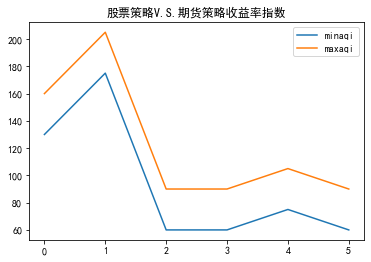

In [16]:
air_quality_hebei_df = ak.air_quality_hebei(symbol="保定市")
air_quality_hebei_df 
air_quality_hebei_df.plot()

plt.title("股票策略V.S.期货策略收益率指数")
plt.legend()
plt.show()

,2020年,2021年
月份,,
1月,4.1478,15.5388
2月,1.2431,9.7059
3月,5.4619,18.5328
4月,5.5870,16.1418
5月,6.7363,18.7316
6月,8.3278,22.9634
7月,8.2568,22.2233
8月,9.3297,24.9588
9月,11.0416,33.3532


<AxesSubplot:>

Text(0.5, 1.0, '乘联会-新能源细分市场')

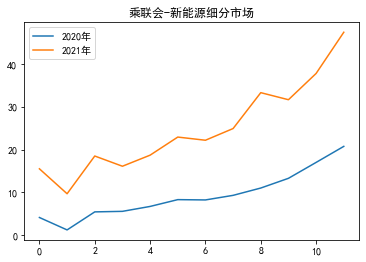

In [42]:

car_cpca_energy_sale_df = ak.car_cpca_energy_sale()
car_cpca_energy_sale_df.set_index('月份')
car_cpca_energy_sale_df.plot()

plt.title("乘联会-新能源细分市场")
plt.legend()
plt.show()

### 11 - 查看数据类型

查看 df1 各列的数据类型

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      1146 non-null   object 
 1   开盘      1146 non-null   float64
 2   收盘      1146 non-null   float64
 3   最高      1146 non-null   float64
 4   最低      1146 non-null   float64
 5   成交量     1146 non-null   int64  
 6   成交额     1146 non-null   int64  
 7   振幅      1146 non-null   float64
 8   涨跌幅     1146 non-null   float64
 9   涨跌额     1146 non-null   float64
 10  换手率     1146 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 98.6+ KB


### 12 - 时间类型转换

将 df1 和 df2 的 日期 列转换为 pandas 支持的时间格式

In [30]:
df1['日期'] = pd.to_datetime(df1['日期'])
df2['时间'] = pd.to_datetime(df2['时间'])

### 13 - 日期筛选｜区间

筛选出 df2 时间在 `2021-08-03 09:35:00` 与 `2021-08-04 15:00:00` 之间的数据

In [31]:
df2[(df2['时间'] > '2021-08-03 09:35:00') & (df2['时间'] < '2021-08-04 15:00:00')]

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
1,2021-08-03 09:40:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2,2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
3,2021-08-03 09:50:00,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
4,2021-08-03 09:55:00,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01
5,2021-08-03 10:00:00,17.78,17.81,17.83,17.74,0.23,0.04,18111,32208076,0.51,0.01
...,...,...,...,...,...,...,...,...,...,...,...
90,2021-08-04 14:35:00,17.81,17.81,17.83,17.78,0.00,0.00,12903,22973276,0.28,0.01
91,2021-08-04 14:40:00,17.82,17.80,17.85,17.79,-0.06,-0.01,12254,21835743,0.34,0.01
92,2021-08-04 14:45:00,17.82,17.82,17.84,17.80,0.11,0.02,9893,17631076,0.22,0.01
93,2021-08-04 14:50:00,17.81,17.80,17.83,17.80,-0.11,-0.02,12127,21603534,0.17,0.01


![公众号：早起Python](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/18/16319660121648.jpg?域名/sample.jpg?x-oss-process=style/stylename)

### 14 - 日期筛选｜指定

筛选 df2 时间为 2021-08-03 的全部数据

In [32]:
df2.set_index('时间').truncate(after=pd.Timestamp('2021-08-04'))
df2
# .

,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
时间,,,,,,,,,,
2021-08-03 09:35:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807,94339287,1.50,0.03
2021-08-03 09:40:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
2021-08-03 09:50:00,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
2021-08-03 09:55:00,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01
...,...,...,...,...,...,...,...,...,...,...
2021-09-13 14:40:00,20.15,20.17,20.21,20.13,0.05,0.01,16093,32451916,0.40,0.01
2021-09-13 14:45:00,20.18,20.21,20.21,20.13,0.20,0.04,16191,32677812,0.40,0.01
2021-09-13 14:50:00,20.22,20.21,20.26,20.18,0.00,0.00,24419,49373556,0.40,0.01


In [33]:
df2.truncate(after=pd.Timestamp('2021-08-04'))

,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
时间,,,,,,,,,,
2021-08-03 09:35:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807,94339287,1.50,0.03
2021-08-03 09:40:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
2021-08-03 09:50:00,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
2021-08-03 09:55:00,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01
2021-08-03 10:00:00,17.78,17.81,17.83,17.74,0.23,0.04,18111,32208076,0.51,0.01
2021-08-03 10:05:00,17.83,17.84,17.91,17.79,0.17,0.03,28273,50498772,0.67,0.01
2021-08-03 10:10:00,17.84,18.01,18.01,17.83,0.95,0.17,37675,67585497,1.01,0.02
2021-08-03 10:15:00,18.01,18.05,18.09,18.01,0.22,0.04,31315,56528108,0.44,0.02


### 15 - 金融计算｜涨跌额

`df1` 新增一列 涨跌，计算前后两日收盘价之差

注意：虽然我们的df1包含涨跌额列，但是这个操作很常用，所以练习一下

In [35]:
df1['涨跌']  = df1.收盘.diff()
df1['涨跌']

0        NaN
1       0.00
2       0.01
3      -0.04
4       0.02
        ... 
1141   -0.01
1142   -0.23
1143    1.57
1144   -0.36
1145   -0.84
Name: 涨跌, Length: 1146, dtype: float64

### 16 - 金融计算｜涨跌幅

`df1` 新增一列 涨跌变化率，计算前后两日收盘价之差的变化率

注意：虽然我们的df1包含涨跌幅列，但是这个操作很常用，所以练习一下，结果可以用于验证

In [36]:
df1['涨跌变化率'] = (df1.收盘.pct_change()).apply(lambda x: format(x, '.2%'))
df1['涨跌变化率']

0         nan%
1        0.00%
2        0.12%
3       -0.48%
4        0.24%
         ...  
1141    -0.05%
1142    -1.20%
1143     8.26%
1144    -1.75%
1145    -4.16%
Name: 涨跌变化率, Length: 1146, dtype: object

### 17 - 金融计算｜移动均值

计算收盘价的5日移动均线

In [37]:
df1.收盘.rolling(window=5).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4        8.314
         ...  
1141    18.672
1142    18.792
1143    19.298
1144    19.650
1145    19.676
Name: 收盘, Length: 1146, dtype: float64

### 18 - 金融计算｜移动均值（可视化）

计算并绘制收盘价的5日移动均线

<AxesSubplot:>

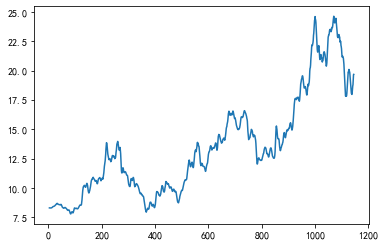

In [38]:
df1.收盘.rolling(window=5).mean().plot()

### 19 - 金融计算｜移动均值（可视化）

同时计算并绘制 df1 的收盘价、5日均线、20日均线

<AxesSubplot:xlabel='日期'>

<AxesSubplot:xlabel='日期'>

<AxesSubplot:xlabel='日期'>

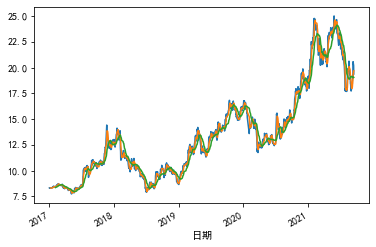

In [39]:
df1.set_index("日期")['收盘'].plot()
df1.set_index("日期")['收盘'].rolling(5).mean().plot()
df1.set_index("日期")['收盘'].rolling(20).mean().plot()

### 20 - 金融计算｜指数移动平均值（EMA）

根据 df1 计算 EMA20

In [43]:
df1['EMA20'] = df1['收盘'].ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()

### 21 - 金融计算｜MACD

计算 df1 的 MACD 指标

### 22 - 金融计算｜布林指标

计算并绘制布林指标，计算方法参考[百度百科](https://baike.baidu.com/item/%E5%B8%83%E6%9E%97%E7%BA%BF%E6%8C%87%E6%A0%87/3325894?fromtitle=%E5%B8%83%E6%9E%97%E6%8C%87%E6%A0%87&fromid=258891&fr=aladdin)


### 23 - 日期移动｜值

将 df1 的索引设置为日期，将 df1 数据向后移动一天

### 24 - 日期移动｜索引

将 df1 的索引设置为日期，并将全部日期向后移动一天

### 25 - 日期重采样｜日 -> 周

按周对 df1 进行重采样，保留每周最后一个数据

### 26 - 日期重采样｜日 -> 月

按月对 df1 进行重采样，保留每月最后一个数据

### 27 - 日期重采样｜分钟 -> 日

按日对 df2 进行重采样，保留每天最后一个数据

微信搜索公众号「早起Python」，关注后可以获得更多资源！

### 28 - 日期重采样｜低频 -> 高频

将 df2 的 5分钟 数据改为 3分钟，缺失数据向前填充

## 8-3 K线图

<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>

在 Python 中绘制k线图有很多方法，例如可以直接用 matplotlib 进行绘制。

本习题将基于一个简单易上手的库 `mplfinance` 进行展开。

如果未安装 mplfinance 需要先执行下面的代码进行安装！

In [ ]:
! pip install mplfinance

安装后执行下面的代码导入

In [44]:
import mplfinance as mpf

使用 mplfinance 有固定的格式!

数据必须是`Pandas DataFrame`格式，必须包含开盘价、最高价、最低价和收盘价，需要使用`DatetimeIndex`作为索引

为了方便大家练习，第一个K线图我将引导大家制作！

首先就是将数据处理为它指定的形状👇

### 29 - 数据处理｜选择列

<br>

筛选 `df1` 中`'日期','开盘','最高','最低','收盘','成交量'`几列，并命名为新数据框 `df_new`

In [45]:
df_new = df1[['日期','开盘','最高','最低','收盘','成交量']]

### 30 - 数据处理｜修改列名

<br>

将 df_new 的列名修改为 `'Date','Open','High','Low','Close','Volume'`

In [46]:
df_new.columns = ['Date','Open','High','Low','Close','Volume']

### 31 - 数据处理｜修改索引

<br>

将 df_new 的索引列修改为 Date 列

In [47]:
df_new.set_index(["Date"], inplace=True)

### 32 - 制作K线图｜日线

根据 df_new 绘制日线级K线

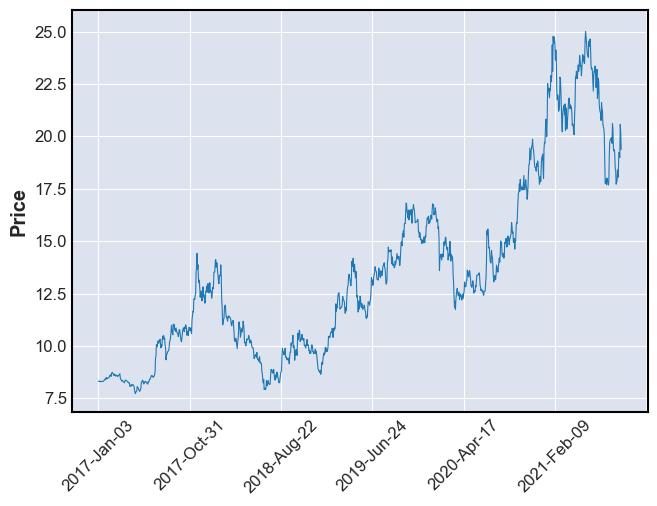

In [48]:
mpf.plot(df_new, type='line')

### 33 - 制作K线图｜添加移动均线

在上一题的基础上，添加5日、10日、15日移动均线

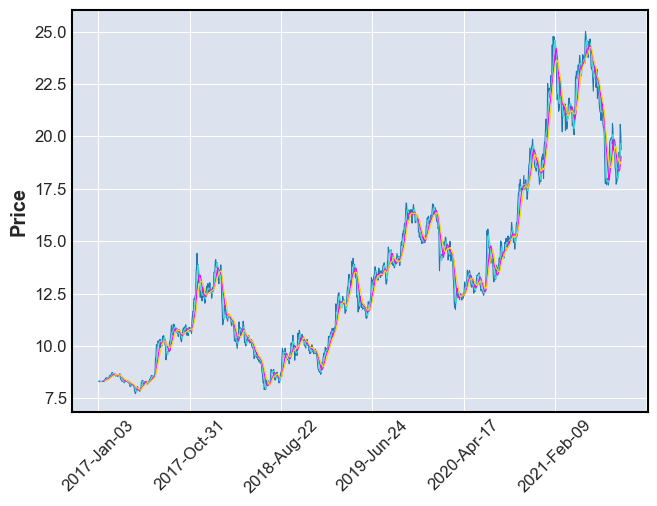

In [49]:
mpf.plot(df_new, type='line',mav=(5,10,15))

### 34 - 制作K线图｜添加成交量

在上一题的基础上，添加成交量

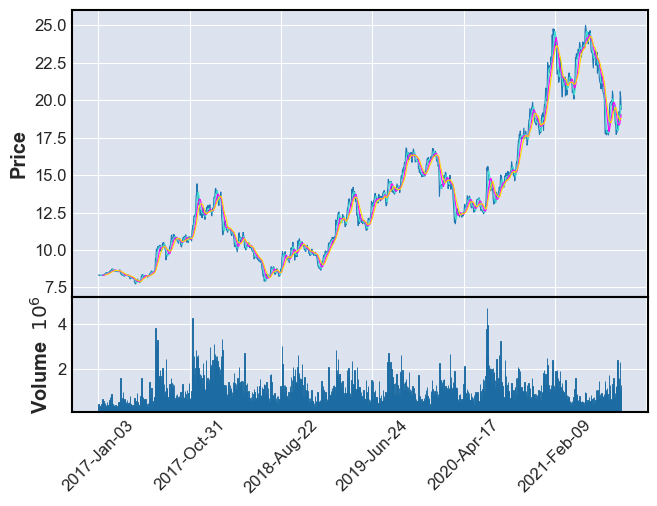

In [50]:
mpf.plot(df_new, type='line',mav=(5,10,15), volume=True)

### 35 - 制作K线图｜周线

对 df1 进行重采样，制作周线级K线

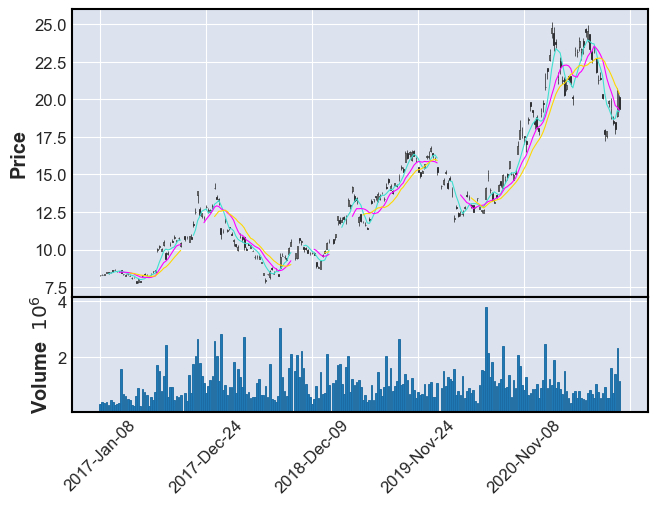

In [51]:
df_new = df1.set_index('日期').resample('W').last()
df_new = df_new[['开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Open','High','Low','Close','Volume']
mpf.plot(df_new, type='candle',mav=(5,10,15), volume=True)

### 36 - 制作K线图｜蜡烛图

使用 df2 数据，筛选出 8月3日 的数据，制作蜡烛图

In [59]:
df_new = df2[(df2['时间'] > '2021-08-03 09:35:00') & (df2['时间'] < '2021-08-03 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)

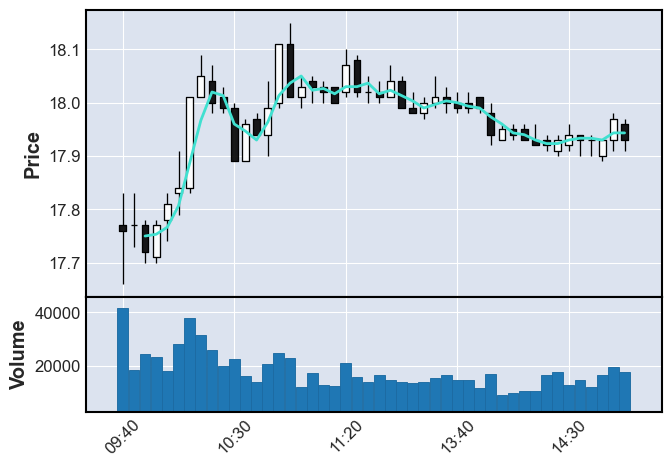

### 37 - 制作K线图｜展示非交易时间

<br>

使用 df2 数据，筛选 8月3日-8月4日的数据，制作蜡烛图并展示非交易时间区间

In [60]:
df_new = df2[(df2['时间'] > '2021-08-03 9:00:00') & (df2['时间'] < '2021-08-04 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)

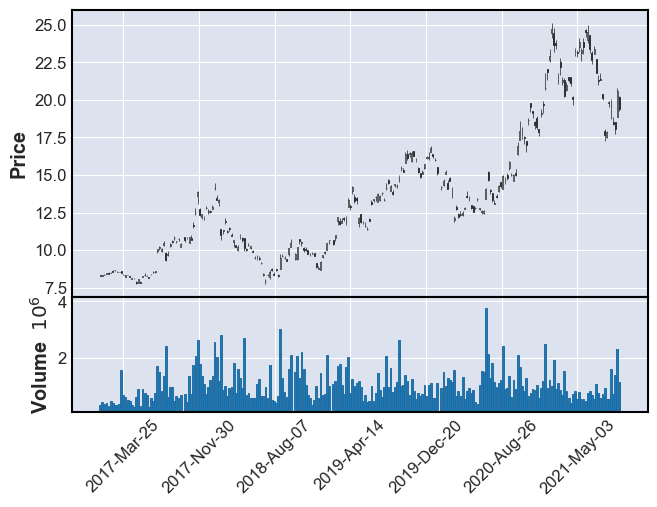

In [55]:
mpf.plot(df_new,type='candle',show_nontrading=True, volume=True)

![](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/16/16317972442543.jpg?域名/sample.jpg?x-oss-process=style/stylename)